# Choosing sections for sampling

In [2]:
import cf_xarray
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [1]:
monthly2 = xr.open_zarr("/glade/work/dcherian/etpac/subset/epbl-monthly.zarr/")
monthly2

NameError: name 'xr' is not defined

In [6]:
field = monthly2.isel(time=1).mld.compute()

In [3]:
geometry = xr.open_dataset(
    "../ocean_geometry_20.nc"
).rename({"lath": "yh", "latq": "yq", "lonh": "xh", "lonq": "xq"})
geometry

<xarray.Dataset>
Dimensions:  (xh: 1000, xq: 1001, yh: 900, yq: 901)
Coordinates:
  * yh       (yh) float64 -14.97 -14.93 -14.88 -14.82 ... 29.88 29.92 29.98
  * xh       (xh) float64 235.0 235.1 235.1 235.2 ... 284.8 284.9 284.9 285.0
  * yq       (yq) float64 -15.0 -14.95 -14.9 -14.85 ... 29.85 29.9 29.95 30.0
  * xq       (xq) float64 235.0 235.1 235.1 235.2 ... 284.9 284.9 284.9 285.0
Data variables:
    geolatb  (yq, xq) float64 ...
    geolonb  (yq, xq) float64 ...
    geolat   (yh, xh) float64 ...
    geolon   (yh, xh) float64 ...
    D        (yh, xh) float64 ...
    f        (yq, xq) float64 ...
    dxCv     (yq, xh) float64 ...
    dyCu     (yh, xq) float64 ...
    dxCu     (yh, xq) float64 ...
    dyCv     (yq, xh) float64 ...
    dxT      (yh, xh) float64 ...
    dyT      (yh, xh) float64 ...
    dxBu     (yq, xq) float64 ...
    dyBu     (yq, xq) float64 ...
    Ah       (yh, xh) float64 ...
    Aq       (yq, xq) float64 ...
    dxCvo    (yq, xh) float64 ...
    dyCuo    (yh, xq) float64 ...
    wet      (yh, xh) float64 ...
Attributes:
    filename:  ./ocean_geometry.nc

13


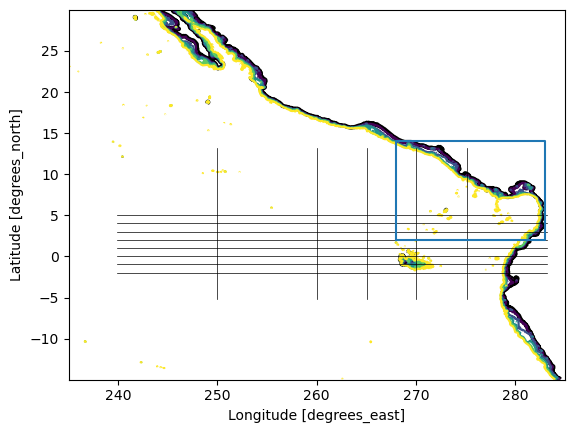

In [13]:
%matplotlib inline
    
varnames = [
    "uo", "vo", "wo", "zos",
    "thetao", "so",
    "taux", "tauy",
    "net_heat_surface", "SW", 
    "Tflx_dia_diff", "Sflx_dia_diff",  # "wd",
    "Kd_heat", "Kd_salt", "Kd_ePBL", "Kd_shear",
    "Kv_u",
    "ePBL_h_ML", 
]


lons = 360 + np.array([-110-0.1, -100, -95, -90, -85+0.1])
lats = np.round(np.arange(-2, 5.01, 1), 2)
print(len(lats) + len(lons))

lat_min, lat_max = -5-0.15, 13+0.15    # 100, 500
lon_min, lon_max = 240-0.15, 283+0.2 # 100, 800

geometry.D.plot.contour(levels=[1], colors='k', linewidths=3)
geometry.D.plot.contour(levels=[25, 100, 200, 500, 1000])

coord = lons
index_name = "xh"

top = dict()

delta = 0

line = "# eq Pac sections\n"
for index_name, coord in zip(["xh", "yh"], [lons, lats]):
    index = geometry.indexes[index_name]
    for c in coord:
        i = index.get_loc(c, method="nearest")

        #for idx in [index[i-1], index[i], index[i+1]]:
        #    if index_name == "xh":
        #        regionstr = f'"{idx:.3f} {idx:.3f} {lat_min} {lat_max} -1 -1"'
        #        plt.plot([idx, idx], [lat_min, lat_max], lw=0.5, color='k')

        #    elif index_name == "yh":
        #        regionstr = f'"{lon_min} {lon_max} {idx:.3f} {idx:.3f} -1 -1"'
        #        plt.plot([lon_min, lon_max], [idx, idx], lw=0.5, color='k')

        #    fname = f"section_{regionstr[1:-7].replace(' ', '_')}_%4yr-%3dy"
        #    if fname not in top:
        #        top[fname] = f'"{fname}", 1, "hours", 1, "hours", "time", 1, "days"'
        #    for var in varnames:
        #        line += f'"ocean_model", "{var}", "{var}", "{fname}", "all", "mean", {regionstr}, 2\n'
                # print(fname)
        
        if index_name == "xh":
            regionstr = f'"{index[i-delta]:.3f} {index[i+delta]:.3f} {lat_min} {lat_max} -1 -1"'
            for idx in index[np.arange(i-delta, i+delta+1)]:
                plt.plot([idx, idx], [lat_min, lat_max], lw=0.5, color='k')

        elif index_name == "yh":
            regionstr = f'"{lon_min} {lon_max} {index[i-delta]:.3f} {index[i+delta]:.3f} -1 -1"'
            for idx in index[np.arange(i-delta, i+delta+1)]:
                plt.plot([lon_min, lon_max], [idx, idx], lw=0.5, color='k')

        fname = f"section_{regionstr[1:-7].replace(' ', '_')}_%4yr-%3dy"
        if fname not in top:
            top[fname] = f'"{fname}", 1, "hours", 1, "hours", "time", 1, "days"'
        for var in varnames:
            line += f'"ocean_model", "{var}", "{var}", "{fname}", "all", "mean", {regionstr}, 2\n'
            # print(fname)

    
varnames += ["bbl_thick_u", "kv_bbl_u", "Kd_BBL", ]

lat_min, lat_max = 2, 14  
lon_min, lon_max = 268, 283 

plt.plot([lon_min, lon_max, lon_max, lon_min, lon_min], [lat_min, lat_min, lat_max, lat_max, lat_min])

fname = "ocean_shelf_%4yr_%3dy"
regionstr = f'"{lon_min} {lon_max} {lat_min} {lat_max} -1 -1"'

top[fname] = f'"{fname}",  3, "hours", 1, "hours", "time", 1, "days"\n\n\n'
line+= "\n\n # coastal \n\n"
for var in varnames:
    line += f'"ocean_model", "{var}", "{var}", "{fname}", "all", "mean", {regionstr}, 2\n'
    
with open("../diag_table.txt", "w") as file:
    file.write("\n".join(top.values()) + "\n" + line)

In [169]:
varnames

['uo',
 'vo',
 'wo',
 'zos',
 'thetao',
 'so',
 'taux',
 'tauy',
 'net_heat_surface',
 'SW',
 'Tflx_dia_diff',
 'Sflx_dia_diff',
 'wd',
 'diabatic_diff_temp_tendency',
 'diabatic_salt_tendency',
 'Kd_heat',
 'Kd_salt',
 'Kd_ePBL',
 'Kd_shear',
 'Kv_v',
 'Kv_u',
 'ePBL_h_ML',
 'bbl_thick_u',
 'kv_bbl_u',
 'Kd_BBL']

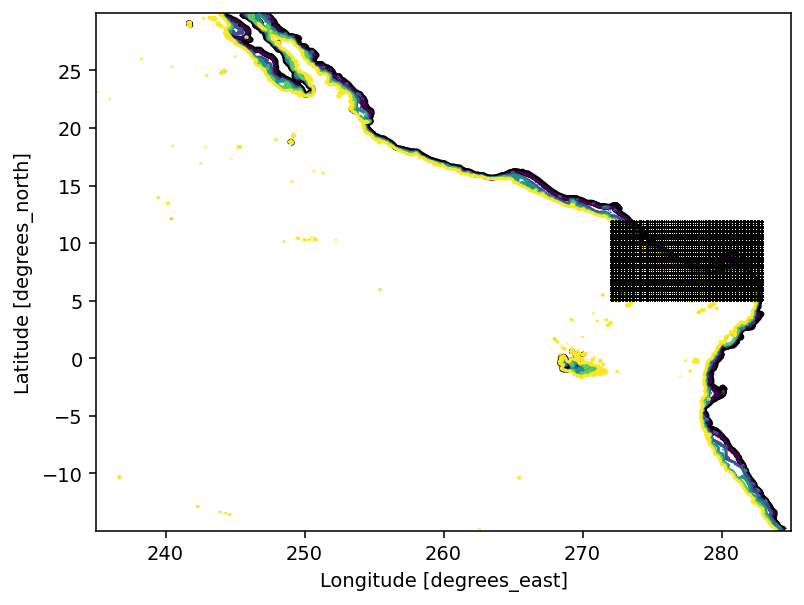

In [104]:
lons = np.round(np.arange(lon_min, lon_max, 0.1), 2)
lats = np.round(np.arange(lat_min, lat_max, 0.1), 2)


geometry.D.plot.contour(levels=[1], colors='k', linewidths=3)
geometry.D.plot.contour(levels=[25, 100, 200, 500, 1000])

coord = lons
index_name = "xh"

for index_name, coord in zip(["xh", "yh"], [lons, lats]):
    index = geometry.indexes[index_name]
    for c in coord:
        i = index.get_loc(c, method="nearest")
        
        if index_name == "xh":
            #print(f'"{index[i-1]} {index[i+1]} {lat_min} {lat_max} -1 -1"')
            for x in [index[i]]: # [index[i-1], index[i], index[i+1]]:
                plt.plot([x, x], [lat_min, lat_max], lw=0.5, color='k')
        elif index_name == "yh":
            #print(f'"{lon_min} {lon_max} {index[i-1]} {index[i+1]} -1 -1"')
            for x in [index[i]]: #[index[i-1], index[i], index[i+1]]:
                plt.plot([lon_min, lon_max], [x, x], lw=0.5, color='k')

## Test

## heat flux weirdness

There is a dip right at midnight with the "regional" output.

In [110]:
import glob
files = glob.glob("/glade/scratch/bachman/ETP.011/run/section_239.875*00[1-2]*.nc*")

def preprocess(ds):
    return ds[["net_heat_surface", "SW"]]
ds = xr.open_mfdataset(files, use_cftime=True, preprocess=preprocess, join="outer", coords="minimal", data_vars="minimal", compat="override")

In [111]:
ds.SW

<xarray.DataArray 'SW' (time: 48, yh_sub01: 301, xh_sub02: 3)>
dask.array<concatenate, shape=(48, 301, 3), dtype=float32, chunksize=(24, 56, 3), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 2013-01-01 00:30:00 ... 2013-01-02 23:30:00
  * xh_sub02  (xh_sub02) float64 239.9 239.9 240.0
  * yh_sub01  (yh_sub01) float64 -5.025 -4.975 -4.925 ... 9.875 9.925 9.975
Attributes:
    long_name:      Shortwave radiation flux into ocean
    units:          W m-2
    cell_methods:   area:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  net_downward_shortwave_flux_at_sea_water_surface

/glade/u/home/dcherian/python/cf-xarray/cf_xarray/accessor.py:953: UserWarning: Variables {'time_bnds'} not found in object but are referred to in the CF attributes.
  warnings.warn(
/glade/u/home/dcherian/python/cf-xarray/cf_xarray/accessor.py:953: UserWarning: Variables {'time_bnds'} not found in object but are referred to in the CF attributes.
  warnings.warn(


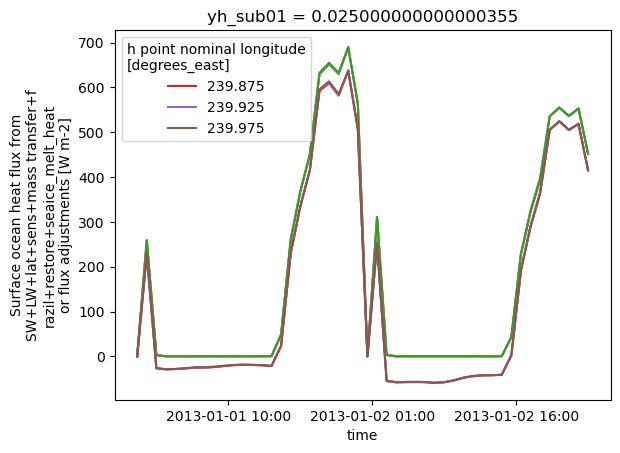

In [114]:
%matplotlib inline

ds["SW"].cf.sel(latitude=0, method="nearest").cf.plot.line(hue="X", x="time")
ds["net_heat_surface"].cf.sel(latitude=0, method="nearest").cf.plot.line(hue="X", x="time")

In [91]:
ds.cf.describe()

Axes:
	X: ['xq_sub01', 'xh_sub01', 'xh_sub02']
	Y: ['yq_sub01', 'yh_sub01']
	Z: ['zi', 'zl']
	T: ['time']

Coordinates:
	longitude: ['xq_sub01', 'xh_sub01', 'xh_sub02']
	latitude: ['yq_sub01', 'yh_sub01']
	vertical: ['zi', 'zl']
	time: ['time']

Cell Measures:
	area: unsupported
	volume: unsupported

Standard Names:
	['net_downward_shortwave_flux_at_sea_water_surface',
'sea_surface_height_above_geoid', 'sea_water_potential_temperature',
'sea_water_salinity', 'sea_water_x_velocity', 'sea_water_y_velocity',
'surface_downward_heat_flux_in_sea_water',
'surface_downward_x_stress', 'surface_downward_y_stress']


In [117]:
plt.figure()
ds.Tflx_dia_diff.cf.isel(X=1).cf.sel(Y=0 ,method="nearest").plot(x="time", yincrease=False, ylim=(150, 0))

AttributeError: 'Dataset' object has no attribute 'Tflx_dia_diff'

<Figure size 640x480 with 0 Axes>